# Machine Learning for Sepsis Pathway 

## Plotting Notebook. 

Setup Libraries and plotting defaults. 

In [1]:
import pickle
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

import seaborn as sns

import Utilities
import importlib
importlib.reload(Utilities)

import MLUtilities
importlib.reload(MLUtilities)

from sklearn.pipeline import Pipeline


# from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_auc_score, accuracy_score, balanced_accuracy_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


# from hyperopt.pyll import scope
# from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK

from hyperopt import hp,Trials,fmin,tpe,STATUS_OK

import xgboost as xgb

from imblearn.over_sampling import SMOTENC


# import sys
# import os
# import pickle

# import pandas as pd
# import numpy as np
# import seaborn as sns
# #import statsmodels.formula.api as smf
# #from statsmodels.stats.anova import anova_lm


# import re
# import matplotlib.pyplot as plt
# from openpyxl import load_workbook
# from pandasql import sqldf
# import sqlalchemy
# import pyodbc

# import dfply as dfp
# from dfply import *

# import datetime
# from datetime import *

# import pyodbc
# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# from sklearn.metrics         import balanced_accuracy_score, precision_score, classification_report
# from sklearn.metrics         import recall_score, f1_score, make_scorer, cohen_kappa_score

# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline
# import sklearn

# from sklearn import model_selection
# from sklearn.model_selection import cross_val_score

# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn import svm
# from sklearn import tree
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier

# import forestci as fci

# from sklearn.linear_model import BayesianRidge
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer, PowerTransformer
# from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_auc_score, accuracy_score, balanced_accuracy_score, precision_score
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
# #from statsmodels.stats.outliers_influence import variance_inflation_factor
# #from statsmodels.tools.tools import add_constant
# import xgboost as xgb
# from imblearn.over_sampling import SMOTENC
# n_est=55

# from hyperopt.pyll import scope
# from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK

# pd.set_option('display.max_columns', None)


# import Utilities
# import importlib
# importlib.reload(Utilities)

# import MLUtilities
# importlib.reload(MLUtilities)

# from matplotlib.colors import to_rgba

plt.style.use('./CEIH.mplstyle')
color_dict = {0: to_rgba('#32C0D2', 1),
                1: to_rgba("#E0B165", 1),}

cmap_blended = sns.blend_palette(["#ADE6ED","#70D3E0","#32C0D2","#289AA8","#307078"], as_cmap=True)


import math
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1],idx-1
    else:
        return array[idx],idx
    
OtherValues = {'TriageCategory_2':'Triage Category 2', 'SoBFlag': 'Shortness of Breath', 'TriageCategory_4':'Triage Category 4',
               'TriageCategory_1':'Triage Category 1', 'TriageCategory_5':'Triage Category 5', 'TriageCategory_3':'Triage Category 3',
             'FirstGCSScoreAdult':'Glasgow Coma Scale',
               'FirstUrinalysisBlood': 'Urinalysis Blood', 'IndigenousStatusDescription_Not Aboriginal-TSI':  'Non Indiginous',
               'IndigenousStatusDescription_Not Stated':  'Indiginous Status not stated', 'FirstUrinalysisLeukocytes':'Urinalysis Leukocytes',
               'FirstPulseRateBPM':'Pulse Rate', 'FirstRespiration':'Respiration Rate', 'FirstSpO2':'O2 Saturation (%)',  'Gender_Male':'Sex - Male',
               'FirstLevelofConsciousness':'Level of Consciousness', 'IndigenousStatusDescription_Aboriginal and TSI':'Aboriginal and TSI',
               'IndigenousStatusDescription_TSI':'TSI','Gender_Indeterminate':'Sex - Indeterminate', 'Gender_Unknown':'Sex - Unknown',
               'FirstO2Flow':'O2 Flow ','GENDERCODE_Male':'Sex - Male','GENDERCODE_Unknown':'Sex - Unknown',
               'GENDERCODE_Indeterminate':'Sex - Indeterminate'
               }


plotSettings = {
        #  ( bins, xmin, xmax, log/linear)
        'AGEONADMISSION':(50,20,110,'linear','Age (y)', False, 0,0),
        
        
        'FirstBloodGlucose':(50,0,100,'log','Blood Glucose [mmol/L]', False,0, 0),
        'FirstTemperatureDegreesC':(50,30,45,'log', r"Temperature [$^\circ$C]", True,35.5,38.1),
                'FirstWeightKg':(50,50,150,'log','Weight [kg]', False, 0,0),

        
        'FirstPainAssessment': (11,-0.5,10.5,'log','Pain Assessment', False, 8,10),
        'FirstBPSystolic': (50,50,250,'log', 'BP Systolic [mm Hg]',True, 100,170 ),
        'FirstBPDiastolic': (50,0,200,'log', 'BP Diastolic [mm Hg]', False,0,0),
        'FirstEstimatedGlomerularFiltrationRate': (50,0,100,'log',r"Estimated Glomerular Filtration Rate [mL/min/1.73m$^{2}$]", True, 60, 100),
        'FirstCreatinine': (50,0,800,'log',r"Creatinine - Serum [$\mu$mol/L]", True, 45, 110),
        'FirstAlbumin': (60,0,60,'log','Albumin  Level [g/L]', True, 30, 48),
        'FirstTotalBilirubin': (60,0,100,'log',r"Total Bilirubin Level [$\mu$mol/L]", True, 2, 24 ),
        'FirstAlkalinePhosphatase': (60,0,800,'log','Alkaline Phosphatase Level [U/L]',True, 30,110),
        'FirstAlanineAminotransferase': (60,0,700,'log','Alanine Aminotransferase Level [U/L]', True,0,55),
        'FirstAspartateAminotransferase': (60,0,700,'log','Aspartate Aminotransferase Level [U/L]', True, 0,45),
        'FirstGammaGlutamylTransferase': (60,0,700,'log','Gamma Glutamyl Transferase Level [U/L]', True, 0, 60),
        'FirstLactateDehydrogenase': (60,0,1200,'log','Lactate Dehydrogenase [U/L]', True, 120, 250),
        'FirstHaemoglobin': (50,10, 220,'log','Haemoglobin [g/L]', True, 115, 175),
        'FirstWhiteCellCount': (50,0, 50,'log',r"White Cell Count [$\times 10^{9}$/L]",True, 4,11),
        'FirstPlateletCount': (50,0, 1000,'log',r"Platelet Count [$\times 10^{9}$/L]",True,150,500),
        'FirstNeutrophils': (50,0, 50,'log',r"Absolute Neutrophil Count [$\times 10^{9}$/L]",True,1.80,7.50),
        'FirstDDimer': (40,0, 20,'log',r"D-Dimer [mg/L]",True,0,0.79),
        'FirstCreactiveprotein': (50,0, 600,'log',r"C-Reactive Protein [mg/L]",True, 0,8),
        'FirstTroponinT': (50,0, 600,'log',r"Troponin T Level [mg/L]",True,0,16),
        'FirstNTproBNP': (50,0, 40000,'log',r"NT-pro Brain Natriuretic Peptide [mg/L]",True,0,124),
        
        'FirstAnionGapVenous': (50,0, 50,'log',r"Anion Gap Venous [mmol/L]", True, 7, 17),
        'FirstAnionGapArterial': (50,0, 50,'log',r"Anion Gap Arterial [mmol/L]",  True, 7, 17),
        'FirstBaseExcessVenous': (50,-30, 30,'log',r"Base Excess Venous [mmol/L]", True, -3, 3),
        'FirstBaseExcessArterial': (50,-30, 30,'log',r"Base Excess Arterial [mmol/L]", True, -3, 3),
        'FirstBilirubinVenous': (60,0, 60,'log',r"Bilirubin Venous [$\mu$mol/L]", True, 2,24),
        'FirstBilirubinArterial': (60,0, 60,'log',r"Bilirubin Arterial [$\mu$mol/L]", True, 2,24),
        'FirstCarboxyhaemoglobinVenous': (50,0, 20,'log',r"Carboxyhaemoglobin Venous [%]", True, 0.3, 1.8),
        'FirstCarboxyhaemoglobinArterial': (50,0, 20,'log',r"Carboxyhaemoglobin Arterial [%]", True, 0.3, 1.8),
        'FirstChlorideDirectVenous': (50,50, 150,'log',r"Chloride Direct Venous [mmol/L]",False, 100,109),
        'FirstChlorideDirectArterial': (50,50, 150,'log',r"Chloride Direct Arterial [mmol/L]", True, 100,109),
        'FirstCreatinineVenous':(50,0,500,'log',r"Creatinine Venous [$\mu$mol/L]", True, 50, 120),
        'FirstCreatinineArterial':(50,0,500,'log',r"Creatinine Arterial [$\mu$mol/L]", True, 50,120),
        'FirstGlucoseVenous':(50,0,30,'log',r"Glucose  Venous [mmol/L]", False,0,0),
        'FirstGlucoseArterial':(50,0,30,'log',r"Glucose  Arterial [mmol/L]", True,2.6,5.6),
        'FirstIonised Calcium Venous':(50,0,2,'log',r"Ionised Calcium Venous [mmol/L]", True, 1.1, 1.3),
        'FirstIonised Calcium Arterial':(50,0,2,'log',r"Ionised Calcium Arterial [mmol/L]", True, 1.1, 1.3),
        'FirstLactateVenous':(50,0,30,'log',r"Lactate Venous [mmol/L]", True, 0.2, 2.0),
        'FirstLactateArterial':(50,0,30,'log',r"Lactate Arterial [mmol/L]", True, 0.2, 2.0),
        'FirstMethaemoglobinVenous': (20,0, 3,'log',r"Methaemoglobin Venous [%]", True, 0.4, 1.2),
        'FirstMethaemoglobinArterial': (20,0, 3,'log',r"Methaemoglobin Arterial [%]", True, 0.2,0.6),
        'FirstOxygenSaturationVenous': (50,0, 100,'log',r"Oxygen Saturation Venous [%]", False, 0,0),
        'FirstOxygenSaturationArterial': (50,0, 100,'log',r"Oxygen Saturation Arterial [%]", True,95, 99),
        'FirstOxyhaemoglobinVenous': (50,0, 100,'log',r"Oxyhaemoglobin Venous [%]", False, 0,0),
        'FirstOxyhaemoglobinArterial': (50,0, 100,'log',r"Oxyhaemoglobin Arterial [%]", False, 0,0),
        'FirstReducedHaemoglobinVenous': (50,0, 100,'log',r"Reduced Haemoglobin Venous [%]", False, 0,0),
        'FirstReducedHaemoglobinArterial': (50,0, 100,'log',r"Reduced Haemoglobin Arterial [%]", False, 0,0),
        'FirstTotalHaemoglobinVenous': (50,10, 220,'log','Total Haemoglobin Venous [g/L]', True, 115,180),
        'FirstTotalHaemoglobinArterial': (50,10, 220,'log','Total Haemoglobin Arterial [g/L]', True, 115,180), 
        'FirstpCO2Venous': (50,0,150,'log', 'pCO2 Venous [mm Hg]', True,41,51),
        'FirstpCO2Arterial': (50,0,150,'log', 'pCO2 Arterial [mm Hg]', True, 35, 45 ),
        'FirstpO2Venous': (50,0,200,'log', 'pO2 Venous [mm Hg]', True, 25,40),
        'FirstpO2Arterial': (50,0,200,'log', 'pO2 Arterial [mm Hg]', True,67, 108),
        'FirstpHVenous': (50,6.8,7.8,'log', 'pH Venous', True, 7.32,7.42),
        'FirstpHArterial': (50,6.8,7.8,'log', 'pH Arterial', True, 7.36, 7.44),
        'FirstPotassiumDirectVenous':(50,0,10,'log',r"Potassium Direct Venous [mmol/L]", False, 0,0),
        'FirstPotassiumDirectArterial':(50,0,10,'log',r"Potassium Direct Arterial [mmol/L]", True, 3.1, 4.2),
        'FirstSodiumDirectVenous':(50,100,180,'log',r"Sodium Direct Venous [mmol/L]", False, 0,0),
        'FirstSodiumDirectArterial':(50,100,180,'log',r"Sodium Direct Arterial [mmol/L]", True, 137, 145),
        
        'FirstO2Flow':(20,0,20,'log',r"O$_{2}$ Flow", True,0,5),
        'FirstPulseRateBPM':(50,0,200,'log','Pulse Rate',True,60,100),
        'FirstSpO2':(50,0,100,'log',r"O$_{2}$ Saturation [%]",True,94,100),
         'FirstRespiration':(20,0,40,'log','Respiration Rate',True,10,21),
         'FirstLevelofConsciousness':(4,-0.5,3.5,'log',"Level of Consciousness",True,-0.5,2),
        'FirstGCSScoreAdult':(16,-0.5,15.5,'log','Glasgow Coma Scale',False,0,0)
        
        }


# Settings for Machine Learning Model 

# Load Data Files 

In [2]:

# start_date =  '2023-01-01'  #dates[Facility][0]
# end_date   =  '2024-01-01' #dates[Facility][1]

# select_start_date = '2023-01-01'

# DataReasons = "Training"

start_date =  '2024-01-01'  #dates[Facility][0]
end_date   =  '2024-08-01' #dates[Facility][1]

select_start_date = '2023-01-01'

DataSet = 'DataSet3'

DataReasons = "Verification"
# clinics=Utilities.clinics(Facilit

Data_Storage_File = 'DataFiles\Emergency_IPInfo_Complete_Numeric_Numeric_{}_{}_{}_Stage_01.pkl'.format(start_date,end_date,DataReasons)
print(Data_Storage_File)


with open(Data_Storage_File, 'rb') as file:
    Emergency_IPInfo_Complete_Numeric = pd.read_pickle(file)

DataFiles\Emergency_IPInfo_Complete_Numeric_Numeric_2024-01-01_2024-08-01_Verification_Stage_01.pkl


In [3]:
Data_Storage_File = 'DataFiles\Indigenous_EDI_list.pkl'   #.format(start_date,end_date,DataReasons)
print(Data_Storage_File)

with open(Data_Storage_File, 'rb') as file:
    indiginous_client_list = pd.read_pickle(file)

DataFiles\Indigenous_EDI_list.pkl


In [4]:
Emergency_IPInfo_Complete_Numeric = Emergency_IPInfo_Complete_Numeric.loc[:,~Emergency_IPInfo_Complete_Numeric.columns.duplicated()].copy()

In [5]:
importlib.reload(MLUtilities)
Emergency_IPInfo_Complete_Numeric = MLUtilities.setNumeric(Emergency_IPInfo_Complete_Numeric)

# Setup Machine Learning Information 

In [6]:
# # Sepsis HeartFailure PE Pneumonia COPD UTI
# # SepsisPneumonia
Diagnosis =   "Sepsis"
# # Diagnosis = 'SepsisPneumonia'
# Diagnosis = 'Admission'
# Diagnosis = 'GenMed'

DiagnosisString=Diagnosis+'Flag'

# DataSet1 All observations 
# DataSet2 Not including Oxygen Flow 
# Dataset3  Dataset2 plus age and gender
#  Dataset4 3 plus restriction on TC to 3 4 and 5 
#  Dataset 3 with LoS > 6 hours. 



DataSet = 'DataSet3'




In [7]:
Emergency_IPInfo_Complete_Numeric.IndiginousStatus.unique()

array(['Not Aboriginal-TSI', 'Aboriginal', 'Not Stated',
       'Aboriginal and TSI', 'TSI', None], dtype=object)

In [8]:
Emergency_IPInfo_Complete_Numeric['IndiginousFlag'] = 0  # np.where((Emergency_IPInfo_Complete_Numeric.IndiginousStatus.isna()|Emergency_IPInfo_Complete_Numeric.IndiginousStatus=='Not Aboriginal-TSI'),0,1)

Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.IndiginousStatus.isin(['Aboriginal','Aboriginal and TSI', 'TSI']),'IndiginousFlag'] = 1

In [9]:
Emergency_IPInfo_Complete_Numeric.columns

Index(['CLIENTGUID', 'CHARTGUID', 'VISITGUID', 'JOURNEY_ID', 'AGEONADMISSION',
       'GENDERCODE', 'IndiginousStatus', 'HOSIPTALPROXY', 'TRIAGE_CATEGORY',
       'ADMITDTM',
       ...
       'FirstOxygenSaturationArterialDtm', 'FirstOxyhaemoglobinArterialDtm',
       'FirstpCO2ArterialDtm', 'FirstpHArterialDtm', 'FirstpO2ArterialDtm',
       'FirstPotassiumDirectArterialDtm', 'FirstReducedHaemoglobinArterialDtm',
       'FirstSodiumDirectArterialDtm', 'FirstTotalHaemoglobinArterialDtm',
       'IndiginousFlag'],
      dtype='object', length=183)

In [10]:
Emergency_IPInfo_Complete_Numeric['IndigenousEDIFlag'] = 0  # np.where((Emergency_IPInfo_Complete_Numeric.IndiginousStatus.isna()|Emergency_IPInfo_Complete_Numeric.IndiginousStatus=='Not Aboriginal-TSI'),0,1)
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.CLIENTGUID.isin(indiginous_client_list),'IndigenousEDIFlag'] = 1

In [11]:


GenMedList = ['LMH-LGMED','LMH-LAMU',
              "MPH-MGMED", 
              "FMC-GENMED",
              "NHS-GENMED",
              "RAH-GENMED",
              "QEH-GENMED", 'QEH-GM-AMU'
              ]
# DiagnosisString='SepsisFlag'

if Diagnosis == "SepsisPneumonia":
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.SepsisFlag==1)|(Emergency_IPInfo_Complete_Numeric.PneumoniaFlag==1), DiagnosisString] = 1

if Diagnosis == 'Admission':
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>24), DiagnosisString] = 1
    
    if DataSet == 'DataSet5':
        Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
        Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>6), DiagnosisString] = 1


if Diagnosis == 'GenMed':
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    for g in GenMedList:
        Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.GROUPCODE.str.contains(g))  & (Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>6), DiagnosisString] = 1
   


print("Diagnosis being investigated = {}".format(DiagnosisString))
print("Total Number of Cases = {}".format(len(Emergency_IPInfo_Complete_Numeric.index)))
print("Number of {} Cases ".format(DiagnosisString),len(Emergency_IPInfo_Complete_Numeric[Emergency_IPInfo_Complete_Numeric[DiagnosisString]==1]))


Diagnosis being investigated = SepsisFlag
Total Number of Cases = 186948
Number of SepsisFlag Cases  1647


In [12]:
Data_Storage_File = 'ED_Visits_EMR_2024_EDVisits_Summary_df.pkl'  #.format(Facility)
print(Data_Storage_File)

# with open(Data_Storage_File, 'wb') as file:  
#     pickle.dump(EDVists_Summary_df, file)

with open(Data_Storage_File, 'rb') as file:
    EDVists_Summary_df = pd.read_pickle(file)

ED_Visits_EMR_2024_EDVisits_Summary_df.pkl


In [14]:
if DataSet == 'DataSet4':
    df = Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.TRIAGE_CATEGORY>2].copy()
else:
    df = Emergency_IPInfo_Complete_Numeric.copy()
df.name='{} diagnosis detected from full Diagnosis list, updated'.format(Diagnosis)


df['FirstLactateBG'] = np.where(df['FirstLactateArterialDtm'] < df ['FirstLactateVenousDtm'], df['FirstLactateArterial'], df['FirstLactateVenous'])
df['FirstBaseExcessBG'] = np.where(df['FirstBaseExcessArterialDtm'] < df ['FirstBaseExcessVenousDtm'], df['FirstBaseExcessArterial'], df['FirstBaseExcessVenous'])

df['PrimaryDiagnosisCode'] = df['DIAGNOSIS_LIST'].str.split(' ').str[0]



AnalysisVariable =['FirstBPSystolic', 'FirstLevelofConsciousness',
       'FirstPulseRateBPM', 'FirstRespiration', 'FirstSpO2',
       'FirstTemperatureDegreesC', 'FirstO2Flow',
       DiagnosisString]

# if DataSet == 'DataSet1':
#        AnalysisVariable.append('FirstO2Flow')
if DataSet == 'DataSet3':
       AnalysisVariable.append('GENDERCODE')
       AnalysisVariable.append('AGEONADMISSION')

if DataSet == 'DataSet30':
       AnalysisVariable.append('GENDERCODE')
       AnalysisVariable.append('AGEONADMISSION')
       AnalysisVariable.append('IndiginousFlag')

# if DataSet == 'DataSet2': AnalysisVariable.append('FirstLactateBG')
# if DataSet == 'DataSet3': 
#        AnalysisVariable.append('FirstLactateBG')
#        AnalysisVariable.append('FirstBaseExcessBG')

importlib.reload(MLUtilities)
df = MLUtilities.setDefaultsLactate(df)

df_verification = df[AnalysisVariable].copy()
df_verification[DiagnosisString] = df_verification[DiagnosisString].astype('int')

# df_verification[DiagnosisString] = df_verification[DiagnosisString].astype('category')
# df_verification['TriageCategory'] = df_verification['TriageCategory'].astype('category')
# df_verification.dropna(inplace=True)




df_verification['FirstLactateBG'] = df['FirstLactateBG'] 
df_verification['FirstBaseExcessBG'] =   df['FirstBaseExcessBG']



Emergency_IPInfo_Complete_Numeric[DiagnosisString] = Emergency_IPInfo_Complete_Numeric[DiagnosisString].astype('int')

df_verification['FirstBPSystolicRed'] = np.where(df_verification['FirstBPSystolic'] <=99, 1, np.where(df_verification['FirstBPSystolic'] >=180, 1, 0))
df_verification['FirstRespirationRed'] = np.where(df_verification['FirstRespiration'] <=7, 1, np.where(df_verification['FirstRespiration'] >=26, 1, 0))
df_verification['FirstSpO2Red'] = np.where(df_verification['FirstSpO2'] <=91, 1,  0)
df_verification['FirstO2FlowRed'] = np.where(df_verification['FirstO2Flow'] >=7, 1,  0)
df_verification['FirstPulseRateBPMRed'] = np.where(df_verification['FirstPulseRateBPM'] <=49, 1, np.where(df_verification['FirstPulseRateBPM'] >=120, 1, 0))
df_verification['FirstTemperatureDegreesCRed'] = np.where(df_verification['FirstTemperatureDegreesC'] <=35, 1, np.where(df_verification['FirstTemperatureDegreesC'] >=38.6, 1, 0))
df_verification['FirstLevelofConsciousnessRed'] = np.where(df_verification['FirstLevelofConsciousness'] >=2, 1,  0)
df_verification['FirstLactateBGRed'] = np.where(df_verification['FirstLactateBG'] >=2, 1,  0)

df_verification['FirstBPSystolicPurple'] = np.where(df_verification['FirstBPSystolic'] <=99, 1, np.where(df_verification['FirstBPSystolic'] >=200, 1, 0))
df_verification['FirstRespirationPurple'] = np.where(df_verification['FirstRespiration'] <=7, 1, np.where(df_verification['FirstRespiration'] >=31, 1, 0))
df_verification['FirstSpO2Purple'] = np.where(df_verification['FirstSpO2'] <=88, 1,  0)
df_verification['FirstO2FlowPurple'] = np.where(df_verification['FirstO2Flow'] >=8, 1,  0)
df_verification['FirstPulseRateBPMPurple'] = np.where(df_verification['FirstPulseRateBPM'] <=39, 1, np.where(df_verification['FirstPulseRateBPM'] >=140, 1, 0))
df_verification['FirstLevelofConsciousnessPurple'] = np.where(df_verification['FirstLevelofConsciousness'] >=3, 1,  0)
df_verification['FirstLactateBGPurple'] = np.where(df_verification['FirstLactateBG'] >=4, 1,  0)

RedVariables = []
for c in df_verification.columns:
    if ('First' in c) & ('Red' in c): RedVariables.append(c)
        
PurpleVariables = []
for c in df_verification.columns:
    if ('First' in c) & ('Purple' in c): PurpleVariables.append(c)
    
df_verification['RedNumber'] = df_verification[RedVariables].sum(axis=1)
df_verification['PurpleNumber'] = df_verification[PurpleVariables].sum(axis=1)

y_preds_Purple = np.where(df_verification.PurpleNumber>0,1,0)
y_preds_Red = np.where(df_verification.RedNumber>1,1,0)

df_verification['PurpleFlag'] = np.where(df_verification.PurpleNumber>0,True,False)
df_verification['RedFlag'] = np.where(df_verification.RedNumber>1,True,False)

y_verification = df_verification[[DiagnosisString]]
y_verification.value_counts()

X_verification = df_verification[AnalysisVariable].drop(DiagnosisString, axis=1).copy()
x_vars = X_verification.columns

In [15]:
Data_Storage_File = 'Results/{}_{}_BestFit_Models_Pathway_ED.pkl'.format(DiagnosisString,DataSet)
print(Data_Storage_File)

with open(Data_Storage_File, 'rb') as file:
    ObjectsToSave = pd.read_pickle(file)

Results/SepsisFlag_DataSet3_BestFit_Models_Pathway_ED.pkl


In [16]:
best_model_RandomForest, best_model_XGBoost, all_cols, X_valid, y_valid = ObjectsToSave


In [17]:
ModelChoice = 'XGB'

if ModelChoice == 'RF':
    best_model = best_model_RandomForest
    tmpString = 'Random Forest'
elif ModelChoice == 'XGB':
    best_model = best_model_XGBoost
    tmpString = 'XG Boost'

In [18]:
y_preds=best_model.predict (X_valid)

y_preds_proba=best_model.predict_proba (X_valid)
yprobs = np.delete(y_preds_proba,[0],1)
yprobs2 = np.ravel(yprobs,order='c') 

y2=np.ravel(y_valid,order='c')

y_verification_preds=best_model.predict (X_verification)

y_verification_preds_proba=best_model.predict_proba (X_verification)
y_verification_probs = np.delete(y_verification_preds_proba,[0],1)
y_verification_probs2 = np.ravel(y_verification_probs,order='c') 

y_verification_2=np.ravel(y_verification,order='c')

dropIdx = Emergency_IPInfo_Complete_Numeric.index.difference(df_verification.index)
Emergency_IPInfo_Complete_Numeric.drop(dropIdx, inplace=True)
Emergency_IPInfo_Complete_Numeric['yprob'] = y_verification_probs

In [19]:
fpr, tpr, thresholds = roc_curve(y_valid, yprobs)
auc = roc_auc_score(y_valid, yprobs)

import math
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1],idx-1
    else:
        return array[idx],idx

val,idx = find_nearest(tpr,0.85)
print(tpr[idx],fpr[idx],thresholds[idx])

0.8537477148080439 0.2110722228298516 0.45776552


In [20]:
Emergency_IPInfo_Complete_Numeric['MLFlag'] = 0
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric['yprob'] > thresholds[idx], 'MLFlag'] = 1

In [21]:
tmp_df  = Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric[DiagnosisString]==1].copy()

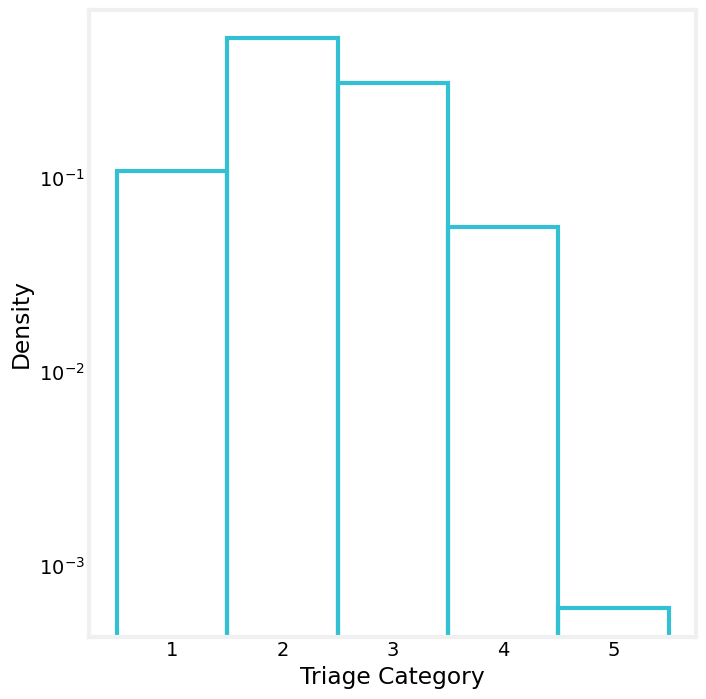

In [22]:
# tmp_df.head()
f, ax = plt.subplots(figsize=(7, 7))
f.tight_layout() 
ax.grid(False)

histGender = sns.histplot(data=tmp_df,x='TRIAGE_CATEGORY', stat="density",common_norm=True,fill=False, linewidth=3,binrange=(0.5,5.5),bins=5)
ax.set(xlabel='Triage Category')
plt.yscale("log")

In [23]:
tmp_df[['TRIAGE_CATEGORY']].count()

TRIAGE_CATEGORY    1647
dtype: int64

In [24]:
visitGUIDs = list(tmp_df.VISITGUID.unique())

In [25]:
timing_df = EDVists_Summary_df.loc[EDVists_Summary_df.VISITGUID.isin(visitGUIDs)].copy() # visitGUIDs
timing_df['FIRSTTRIAGEVALUE'] = pd.to_numeric(timing_df['FIRSTTRIAGEVALUE'],errors='coerce')
timing_df['LASTTRIAGEVALUE'] = pd.to_numeric(timing_df['LASTTRIAGEVALUE'],errors='coerce')


In [26]:
timing_df.index

Index([   482,    618,    925,   1121,   1244,   1448,   1512,   2062,   2171,
         2554,
       ...
       270474, 270626, 271008, 271095, 271191, 271221, 271250, 271540, 271717,
       272188],
      dtype='int64', length=1647)

In [27]:
timing_df = pd.merge(timing_df,Emergency_IPInfo_Complete_Numeric[['VISITGUID','MLFlag']],left_on='VISITGUID',right_on='VISITGUID',how='left')

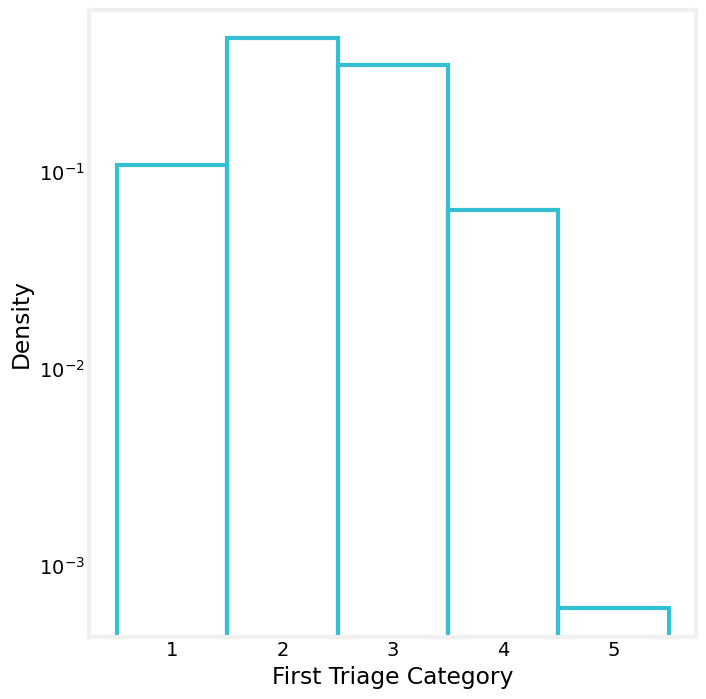

In [28]:
f, ax = plt.subplots(figsize=(7, 7))
f.tight_layout() 
ax.grid(False)

hist1 = sns.histplot(ax=ax,data=timing_df,x='FIRSTTRIAGEVALUE', stat="density",common_norm=True,fill=False, linewidth=3,binrange=(0.5,5.5),bins=5)
# hist2 = sns.histplot(ax=ax,data=timing_df,x='LASTTRIAGEVALUE', stat="density",common_norm=True,fill=False, linewidth=3,binrange=(0.5,5.5),bins=5)

ax.set(xlabel='First Triage Category')
plt.yscale("log")

In [29]:
timing_df.MLFlag.unique()

array([1, 0], dtype=int64)

In [30]:
groupBy = 'FIRSTTRIAGEVALUE'
counts=timing_df[['VISITGUID',groupBy]].groupby(groupBy).count()
counts.rename(columns={'VISITGUID':'Presentations'},inplace=True)

mlflag = timing_df[['MLFlag',groupBy]].groupby(groupBy).sum()
mlflag.rename(columns={'MLFlag':'Presentations with Sepsis ML Flag'},inplace=True)


waitingTime = timing_df[['TIPTimeAfterAdmitMins',groupBy]].groupby(groupBy).median().round(0).astype('Int64')
waitingTime.rename(columns={'TIPTimeAfterAdmitMins':'Waiting Time (min)'}, inplace=True)
waitingTimeMax = timing_df[['TIPTimeAfterAdmitMins',groupBy]].groupby(groupBy).max().round(0).astype('Int64')
waitingTimeMax.rename(columns={'TIPTimeAfterAdmitMins':'Maximum Waiting Time (min)'}, inplace=True)

countMoreThan2Hours = timing_df[( timing_df.TIPTimeAfterAdmitMins>120)][['VISITGUID',groupBy]].groupby(groupBy).count()
countMoreThan2Hours.rename(columns={'VISITGUID':'Waited more than 2 hours for treatment'},inplace=True)

TriageChanges = timing_df.loc[timing_df.FIRSTTRIAGEVALUE!=timing_df.LASTTRIAGEVALUE][['VISITGUID',groupBy]].groupby(groupBy).count()
TriageChanges.rename(columns={'VISITGUID':'Triage Level Changed'},inplace=True)

TriageChangesmlflag = timing_df.loc[timing_df.FIRSTTRIAGEVALUE!=timing_df.LASTTRIAGEVALUE][['MLFlag',groupBy]].groupby(groupBy).sum().astype('Int64')
TriageChangesmlflag.rename(columns={'MLFlag':'TRrage Change with Sepsis ML Flag'},inplace=True)

Sepsis_Presentations = pd.concat((counts,mlflag,TriageChanges,TriageChangesmlflag,waitingTime,waitingTimeMax,countMoreThan2Hours),axis=1)
Sepsis_Presentations['Fraction Triage Level Changed'] =  (Sepsis_Presentations['Triage Level Changed']/Sepsis_Presentations['Presentations']).round(2)
Sepsis_Presentations = Sepsis_Presentations[['Presentations', 'Presentations with Sepsis ML Flag','Triage Level Changed','TRrage Change with Sepsis ML Flag',
                                             'Fraction Triage Level Changed', 'Waiting Time (min)','Maximum Waiting Time (min)','Waited more than 2 hours for treatment']]
Sepsis_Presentations.index.name = 'First Triage Category'

Sepsis_Presentations
# mlflag
# TriageChangesmlflag

,Presentations,Presentations with Sepsis ML Flag,Triage Level Changed,TRrage Change with Sepsis ML Flag,Fraction Triage Level Changed,Waiting Time (min),Maximum Waiting Time (min),Waited more than 2 hours for treatment
First Triage Category,,,,,,,,
1,178,167,1,1,0.01,10,91,<NA>
2,786,695,4,4,0.01,19,315,12
3,576,405,79,61,0.14,104,975,245
4,106,67,16,11,0.15,116,572,48
5,1,0,<NA>,<NA>,<NA>,614,614,1


In [31]:
Sepsis_Presentations.columns

Index(['Presentations', 'Presentations with Sepsis ML Flag',
       'Triage Level Changed', 'TRrage Change with Sepsis ML Flag',
       'Fraction Triage Level Changed', 'Waiting Time (min)',
       'Maximum Waiting Time (min)', 'Waited more than 2 hours for treatment'],
      dtype='object')

In [32]:
timing_df.loc[timing_df.FIRSTTRIAGEVALUE!=timing_df.LASTTRIAGEVALUE]['HOSPITALID'].value_counts()

HOSPITALID
FMC    49
RAH    25
MPH     9
LMH     8
QEH     5
NHS     4
Name: count, dtype: int64

In [33]:
timing_df.head()

,ChartGUID,ClientGUID,AdmitDtm,DischargeDtm,TIPDtm,TIPTimeAfterAdmitMins,TIPCount,TIPInVisit,AABDtm,AABTimeAfterAdmitMins,...,TIPDiff,AABDiff,IPGrouping,CleanTreatmentTime,CleanAdmissionTime,CleanRealTreatmentTime,TimeTreatToAdmissionRequest,TimeAdmissionRequestToEoS,TimeRWTToEoS,MLFlag
0,1890585900170,132610600200,2024-01-01 11:40:00+10:30,2024-01-01 18:49:00+10:30,2024-01-01 11:46:23.320000+10:30,6.388667,1,1,2024-01-01 13:31:37.833000+10:30,111.630550,...,-0.388667,-0.630550,Medical,6.0,111.0,423.000000,105.0,318.0,NaN,1
1,1890612200170,50429700200,2024-01-01 13:07:00+10:30,2024-01-01 20:37:00+10:30,2024-01-01 13:29:34.227000+10:30,22.570450,1,1,2024-01-01 15:57:08.067000+10:30,170.134450,...,-0.570450,-1.134450,Medical,22.0,169.0,226.346833,147.0,281.0,201.653167,1
2,1890680300170,85599200200,2024-01-01 16:47:00+10:30,2024-01-02 04:20:00+10:30,2024-01-01 19:11:22.920000+10:30,144.382000,1,1,2024-01-01 21:51:50.580000+10:30,304.843000,...,-38.382000,-0.843000,Medical,106.0,304.0,436.626450,198.0,389.0,150.373550,1
3,1890714600170,164778000200,2024-01-01 19:16:00+10:30,2024-01-02 00:00:00+10:30,2024-01-01 19:44:11.177000+10:30,28.186283,1,1,2024-01-01 22:46:46+10:30,210.766667,...,-0.186283,-0.766667,Womens,28.0,210.0,256.000000,182.0,74.0,NaN,0
4,1890733900170,1288700200,2024-01-01 20:44:00+10:30,2024-01-02 14:34:00+10:30,2024-01-01 22:55:47.277000+10:30,131.787950,1,1,2024-01-02 09:36:19.883000+10:30,772.331383,...,-0.787950,-0.331383,Medical,131.0,772.0,768.506217,641.0,298.0,170.493783,1


In [34]:
timing_df.columns

Index(['ChartGUID', 'ClientGUID', 'AdmitDtm', 'DischargeDtm', 'TIPDtm',
       'TIPTimeAfterAdmitMins', 'TIPCount', 'TIPInVisit', 'AABDtm',
       'AABTimeAfterAdmitMins', 'AABCount', 'AABInVisit', 'RWTDtm',
       'RWTTimeAfterAdmitMins', 'RWTCount', 'RWTInVisit', 'WFDDtm',
       'WFDTimeAfterAdmitMins', 'WFDCount', 'WFDInVisit', 'CDUDtm',
       'CDUTimeAfterAdmitMins', 'CDUCount', 'CDUInVisit', 'LoS', 'VISITGUID',
       'FIRSTTRIAGEVALUE', 'LASTTRIAGEVALUE', 'HOSPITALID', 'GROUPCODE',
       'DISCHARGEDISPOSITION', 'TREATMENTSTARTEDMINS', 'TreatmentStartedDtm',
       'AdmissionRequestDtm', 'ADMISSIONREQUESTMINS', 'AGEONADMISSION',
       'IPGROUPCODE', 'IPSUBGROUPCODE', 'IPLASTGROUPCODE',
       'IPLASTSUBGROUPCODE', 'IPLOSHOURS', 'IPDISCHARGEDTM', 'TIPDiff',
       'AABDiff', 'IPGrouping', 'CleanTreatmentTime', 'CleanAdmissionTime',
       'CleanRealTreatmentTime', 'TimeTreatToAdmissionRequest',
       'TimeAdmissionRequestToEoS', 'TimeRWTToEoS', 'MLFlag'],
      dtype='object')

In [35]:
timing_df['PreviousEDPresentationDays'] = None 
timing_df['PreviousMLFlag'] = None 
timing_df['PreviousVISITGUID'] = None 




In [36]:
for vGUID in visitGUIDs: 
# vGUID = visitGUIDs[i]
    # print(vGUID)

    clientGUID = Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.VISITGUID==vGUID].CLIENTGUID.values[0]
    # print(clientGUID)
    admitDTM = (Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.VISITGUID==vGUID].ADMITDTM.values[0])
    # print(admitDTM)
    # Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.VISITGUID==vGUID].ADMITDTM.dtypes
    rowidx = Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.VISITGUID==vGUID].index.values[0]
    row = Emergency_IPInfo_Complete_Numeric.loc[rowidx]
    tmp_df = Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.CLIENTGUID==clientGUID)&(Emergency_IPInfo_Complete_Numeric.ADMITDTM<row['ADMITDTM'])].copy()
    tmp_df.sort_values(by='ADMITDTM', inplace=True,ascending=False)

    # print(timing_df.loc[timing_df.VISITGUID==vGUID].AdmitDtm  )
    if (len(tmp_df.index))>0:
        timing_df.loc[timing_df.VISITGUID==vGUID , 'PreviousEDPresentationDays'] = ((row['ADMITDTM'] - tmp_df.DISCHARGEDTM)/np.timedelta64(1, 'D')).iloc[0]    #. min()
        timing_df.loc[timing_df.VISITGUID==vGUID , 'PreviousMLFlag'] = tmp_df['MLFlag'].iloc[0] 
        timing_df.loc[timing_df.VISITGUID==vGUID , 'PreviousVISITGUID'] = tmp_df['VISITGUID'].iloc[0] 

    # print((row['ADMITDTM'] - tmp_df.DISCHARGEDTM).iloc[0])

In [37]:
tmp_df

,CLIENTGUID,CHARTGUID,VISITGUID,JOURNEY_ID,AGEONADMISSION,GENDERCODE,IndiginousStatus,HOSIPTALPROXY,TRIAGE_CATEGORY,ADMITDTM,...,FirstpHArterialDtm,FirstpO2ArterialDtm,FirstPotassiumDirectArterialDtm,FirstReducedHaemoglobinArterialDtm,FirstSodiumDirectArterialDtm,FirstTotalHaemoglobinArterialDtm,IndiginousFlag,IndigenousEDIFlag,yprob,MLFlag


In [38]:
timing_df.loc[timing_df.VISITGUID==vGUID]

,ChartGUID,ClientGUID,AdmitDtm,DischargeDtm,TIPDtm,TIPTimeAfterAdmitMins,TIPCount,TIPInVisit,AABDtm,AABTimeAfterAdmitMins,...,CleanTreatmentTime,CleanAdmissionTime,CleanRealTreatmentTime,TimeTreatToAdmissionRequest,TimeAdmissionRequestToEoS,TimeRWTToEoS,MLFlag,PreviousEDPresentationDays,PreviousMLFlag,PreviousVISITGUID
732,1973677900170,329800100200,2024-04-08 11:27:00+09:30,2024-04-08 16:30:00+09:30,2024-04-08 12:15:17.060000+09:30,48.284333,1,1,NaT,NaN,...,48.0,NaN,255.0,NaN,NaN,NaN,1,None,None,None


In [39]:
groupBy = 'FIRSTTRIAGEVALUE'
counts=timing_df[['VISITGUID',groupBy]].groupby(groupBy).count()
counts.rename(columns={'VISITGUID':'Presentations'},inplace=True)

mlflag = timing_df[['MLFlag',groupBy]].groupby(groupBy).sum()
mlflag.rename(columns={'MLFlag':'Presentations with Sepsis ML Flag'},inplace=True)


waitingTime = timing_df[['TIPTimeAfterAdmitMins',groupBy]].groupby(groupBy).mean().round(0).astype('Int64')
waitingTime.rename(columns={'TIPTimeAfterAdmitMins':'Waiting Time (min)'}, inplace=True)
waitingTimeMax = timing_df[['TIPTimeAfterAdmitMins',groupBy]].groupby(groupBy).max().round(0).astype('Int64')
waitingTimeMax.rename(columns={'TIPTimeAfterAdmitMins':'Maximum Waiting Time (min)'}, inplace=True)

countMoreThan2Hours = timing_df[( timing_df.TIPTimeAfterAdmitMins>120)][['VISITGUID',groupBy]].groupby(groupBy).count()
countMoreThan2Hours.rename(columns={'VISITGUID':'Waited more than 2 hours for treatment'},inplace=True)

TriageChanges = timing_df.loc[timing_df.FIRSTTRIAGEVALUE!=timing_df.LASTTRIAGEVALUE][['VISITGUID',groupBy]].groupby(groupBy).count()
TriageChanges.rename(columns={'VISITGUID':'Triage Level Changed'},inplace=True)

TriageChangesmlflag = timing_df.loc[timing_df.FIRSTTRIAGEVALUE!=timing_df.LASTTRIAGEVALUE][['MLFlag',groupBy]].groupby(groupBy).sum().astype('Int64')
TriageChangesmlflag.rename(columns={'MLFlag':'TRrage Change with Sepsis ML Flag'},inplace=True)



PreviousEDVisit2Days = timing_df[timing_df.PreviousEDPresentationDays<2][['VISITGUID',groupBy]].groupby(groupBy).count()
PreviousEDVisit2Days.rename(columns={'VISITGUID':'Prior ED Visit (2 Days)'},inplace=True)

PreviousEDVisit2DaysML = timing_df[timing_df.PreviousEDPresentationDays<2][['MLFlag',groupBy]].groupby(groupBy).sum().astype('Int64')
PreviousEDVisit2DaysML.rename(columns={'MLFlag':'Prior ED Visit with Sepsis ML Flag(2 Days)'},inplace=True)

Sepsis_Presentations = pd.concat((counts,mlflag,TriageChanges,TriageChangesmlflag,waitingTime,waitingTimeMax,countMoreThan2Hours,PreviousEDVisit2Days,PreviousEDVisit2DaysML),axis=1)
Sepsis_Presentations['Fraction Triage Level Changed'] =  (Sepsis_Presentations['Triage Level Changed']/Sepsis_Presentations['Presentations']).round(2)
Sepsis_Presentations = Sepsis_Presentations[['Presentations', 'Presentations with Sepsis ML Flag','Triage Level Changed','TRrage Change with Sepsis ML Flag',
                                             'Fraction Triage Level Changed', 'Waiting Time (min)','Maximum Waiting Time (min)','Waited more than 2 hours for treatment',
                                             'Prior ED Visit (2 Days)','Prior ED Visit with Sepsis ML Flag(2 Days)']]
Sepsis_Presentations.index.name = 'First Triage Category'

Sepsis_Presentations
# PreviousEDVisit2DaysML

,Presentations,Presentations with Sepsis ML Flag,Triage Level Changed,TRrage Change with Sepsis ML Flag,Fraction Triage Level Changed,Waiting Time (min),Maximum Waiting Time (min),Waited more than 2 hours for treatment,Prior ED Visit (2 Days),Prior ED Visit with Sepsis ML Flag(2 Days)
First Triage Category,,,,,,,,,,
1,178,167,1,1,0.01,17,91,<NA>,6,6
2,786,695,4,4,0.01,28,315,12,6,3
3,576,405,79,61,0.14,144,975,245,24,17
4,106,67,16,11,0.15,144,572,48,4,3
5,1,0,<NA>,<NA>,<NA>,614,614,1,<NA>,<NA>


In [40]:
timing_df.iloc[timing_df[['TIPTimeAfterAdmitMins']].idxmax()]

,ChartGUID,ClientGUID,AdmitDtm,DischargeDtm,TIPDtm,TIPTimeAfterAdmitMins,TIPCount,TIPInVisit,AABDtm,AABTimeAfterAdmitMins,...,CleanTreatmentTime,CleanAdmissionTime,CleanRealTreatmentTime,TimeTreatToAdmissionRequest,TimeAdmissionRequestToEoS,TimeRWTToEoS,MLFlag,PreviousEDPresentationDays,PreviousMLFlag,PreviousVISITGUID
1028,2007497300170,100425600200,2024-05-15 22:08:00+09:30,2024-05-16 15:15:00+09:30,2024-05-16 14:23:00.963000+09:30,975.01605,1,1,2024-05-16 02:25:30.230000+09:30,257.503833,...,975.0,257.0,-468.450283,-718.0,770.0,520.450283,0,0.4625,0,2884557400270


In [41]:
timing_df[timing_df.PreviousEDPresentationDays<2]

,ChartGUID,ClientGUID,AdmitDtm,DischargeDtm,TIPDtm,TIPTimeAfterAdmitMins,TIPCount,TIPInVisit,AABDtm,AABTimeAfterAdmitMins,...,CleanTreatmentTime,CleanAdmissionTime,CleanRealTreatmentTime,TimeTreatToAdmissionRequest,TimeAdmissionRequestToEoS,TimeRWTToEoS,MLFlag,PreviousEDPresentationDays,PreviousMLFlag,PreviousVISITGUID
64,1896422400170,36277300200,2024-01-09 08:53:00+10:30,2024-01-09 15:54:00+10:30,2024-01-09 09:04:47.933000+10:30,11.798883,1,1,2024-01-09 11:07:41.453000+10:30,134.690883,...,11.0,134.000000,410.000000,123.000000,287.000000,NaN,1,1.053472,0,2690957600270
86,1899227600170,156373500200,2024-01-11 15:34:00+10:30,2024-01-11 19:06:00+10:30,2024-01-11 16:00:37.117000+10:30,26.618617,1,1,2024-01-11 19:08:02.947000+10:30,214.049117,...,26.0,214.049117,186.000000,188.049117,-2.049117,NaN,1,1.929861,0,2693388300270
94,1900469200170,156373500200,2024-01-12 21:21:00+10:30,2024-01-13 03:55:00+10:30,NaT,NaN,0,0,NaT,NaN,...,75.0,NaN,319.000000,NaN,NaN,NaN,1,1.09375,1,2697755900270
148,1906958800170,42816800200,2024-01-21 13:52:00+10:30,2024-01-22 17:46:00+10:30,2024-01-21 19:08:32.260000+10:30,316.537667,1,1,2024-01-21 22:56:28.190000+10:30,544.469833,...,174.0,544.000000,438.675333,370.000000,1130.000000,1061.324667,1,1.167361,1,2710100100270
167,1908704900170,160675300200,2024-01-23 13:15:00+10:30,2024-01-23 21:31:00+10:30,2024-01-23 15:05:13.070000+10:30,110.217833,1,1,2024-01-23 18:53:25.780000+10:30,338.429667,...,110.0,338.000000,331.656117,228.000000,158.000000,54.343883,1,0.689583,1,2711703200270
195,1911644200170,39316900200,2024-01-26 19:17:00+10:30,2024-01-26 23:43:00+10:30,2024-01-26 19:48:14.090000+10:30,31.234833,1,1,2024-01-26 20:28:07.677000+10:30,71.127950,...,31.0,71.000000,111.865050,40.000000,195.000000,123.134950,1,0.363889,1,2718751400270
209,1912163400170,111560400200,2024-01-28 14:04:00+10:30,2024-01-28 15:33:00+10:30,NaT,NaN,0,0,2024-01-28 14:54:42.817000+10:30,50.713617,...,45.0,50.000000,43.667833,5.000000,39.000000,0.332167,0,1.490278,1,2719032500270
287,1920974900170,39522100200,2024-02-07 01:37:00+10:30,2024-02-07 16:05:00+10:30,2024-02-07 04:22:51.180000+10:30,165.853000,1,1,2024-02-07 06:00:10.230000+10:30,263.170500,...,165.0,263.000000,601.670000,98.000000,605.000000,101.330000,0,0.627778,0,2732890100270
336,1927576800170,20482100200,2024-02-14 11:00:00+10:30,2024-02-14 12:18:00+10:30,2024-02-14 11:08:15.190000+10:30,8.253167,1,1,2024-02-14 11:43:24.207000+10:30,43.403450,...,8.0,43.000000,70.000000,35.000000,35.000000,NaN,1,1.626389,0,2743023200270
337,1927823500170,235409400200,2024-02-14 13:01:00+10:30,2024-02-14 22:13:00+10:30,2024-02-14 14:03:09.650000+10:30,62.160833,1,1,2024-02-14 15:40:32.453000+10:30,159.540883,...,62.0,159.000000,208.611550,97.000000,393.000000,281.388450,1,0.831944,1,2743834700270


In [42]:
interesting_visits = list(timing_df[timing_df.PreviousEDPresentationDays<2].VISITGUID.unique())

In [43]:
viewColumns = ['CLIENTGUID','VISITGUID','JOURNEY_ID','AGEONADMISSION','HOSIPTALPROXY','ADMITDTM','DISCHARGEDTM','SepsisFlag','MLFlag']

In [44]:
tmep_investigation_df  = Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric[DiagnosisString]==1].copy()

In [45]:
tmep_investigation_df = pd.merge(tmep_investigation_df,timing_df[['VISITGUID','PreviousEDPresentationDays', 'PreviousMLFlag', 'PreviousVISITGUID']],left_on='VISITGUID',right_on='VISITGUID',how='left')

In [46]:
viewColumns = ['CLIENTGUID','VISITGUID','JOURNEY_ID','AGEONADMISSION','HOSIPTALPROXY','ADMITDTM','DISCHARGEDTM','SepsisFlag','MLFlag','PreviousEDPresentationDays', 'PreviousMLFlag', 'PreviousVISITGUID']

In [47]:
tmep_investigation_df.loc[tmep_investigation_df.VISITGUID.isin(interesting_visits)].sort_values(by='CLIENTGUID')[viewColumns] #.head()

,CLIENTGUID,VISITGUID,JOURNEY_ID,AGEONADMISSION,HOSIPTALPROXY,ADMITDTM,DISCHARGEDTM,SepsisFlag,MLFlag,PreviousEDPresentationDays,PreviousMLFlag,PreviousVISITGUID
1246,1771300200,3000788100270,1017712 - 3,76,FMC,2024-07-24 18:33:00+00:00,2024-07-26 12:18:00+00:00,1,1,1.481944,0,2996398400270
415,3180800200,2935790100270,1031780 - 27,66,QEH,2024-06-16 02:33:00+00:00,2024-06-17 07:46:00+00:00,1,1,0.636111,1,2935387100270
1615,6624000200,2810887000270,1066194 - 3,60,NHS,2024-03-26 09:01:00+00:00,2024-03-27 00:28:00+00:00,1,1,0.595139,0,2808779600270
10,20482100200,2746553200270,1204657 - 2,91,RAH,2024-02-14 00:30:00+00:00,2024-02-14 01:48:00+00:00,1,1,1.626389,0,2743023200270
11,22256600200,2841220300270,1222387 - 7,79,RAH,2024-04-16 12:34:00+00:00,2024-04-16 19:21:00+00:00,1,0,1.186806,1,2838531100270
1378,27548600200,3010170200270,1274612 - 3,61,FMC,2024-07-30 20:24:00+00:00,2024-07-31 11:35:00+00:00,1,1,1.683333,0,3006367100270
718,28078900200,2857863000270,1279701 - 6,78,LMH,2024-04-29 00:05:00+00:00,2024-05-01 05:58:00+00:00,1,1,1.217361,1,2857239600270
1419,36277300200,2692787500270,1359274 - 7,91,FMC,2024-01-08 22:23:00+00:00,2024-01-09 05:24:00+00:00,1,1,1.053472,0,2690957600270
466,39316900200,2719077900270,1388655 - 2,90,QEH,2024-01-26 08:47:00+00:00,2024-01-26 13:13:00+00:00,1,1,0.363889,1,2718751400270
474,39522100200,2734965700270,1390707 - 6,89,QEH,2024-02-06 15:07:00+00:00,2024-02-07 05:35:00+00:00,1,0,0.627778,0,2732890100270


In [48]:
viewColumns = ['CLIENTGUID','VISITGUID','JOURNEY_ID','AGEONADMISSION','HOSIPTALPROXY','ADMITDTM','DISCHARGEDTM','SepsisFlag','MLFlag']
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.CLIENTGUID==36277300200 ][viewColumns] #.head()

,CLIENTGUID,VISITGUID,JOURNEY_ID,AGEONADMISSION,HOSIPTALPROXY,ADMITDTM,DISCHARGEDTM,SepsisFlag,MLFlag
163098,36277300200,2690957600270,1359274 - 6,91,FMC,2024-01-07 16:01:00+00:00,2024-01-07 21:06:00+00:00,0,0
163099,36277300200,2692787500270,1359274 - 7,91,FMC,2024-01-08 22:23:00+00:00,2024-01-09 05:24:00+00:00,1,1


In [49]:
Emergency_IPInfo_Complete_Numeric.sort_values(by='ADMITDTM', inplace=True,ascending=False)

In [50]:
for i in interesting_visits:
    print(i)

2692787500270
2697755900270
2699812000270
2710812200270
2713973300270
2719077900270
2719713300270
2734965700270
2746553200270
2747025700270
2748081000270
2756708100270
2795034500270
2804082000270
2805707900270
2808849100270
2810887000270
2815183200270
2836182100270
2836961700270
2837052900270
2841220300270
2857863000270
2868063400270
2877298100270
2878825800270
2883509900270
2883782200270
2886614500270
2917779500270
2922057000270
2935308300270
2935790100270
2953400700270
2971200500270
2973440900270
2997166500270
3000788100270
3004896600270
3010170200270
